In [1]:
import math
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt
import pandas as pd

# 1. Bandstructure for perfect crystal

First, we initialize the crystal structure, using a triangular lattice with airholes of radius 0.3a. The background material is Indium Aluminum Arsenide, with refractive index 3.23 (is this correct?).

In [59]:
k_points = [mp.Vector3(),               # Gamma
              mp.Vector3(y=0.5),          # M
              mp.Vector3(-1 / 3, 1 / 3),  # K
              mp.Vector3()]               # Gamma

k_points = mp.interpolate(4, k_points)

geometry_lattice = mp.Lattice(size=mp.Vector3(3, 3),
                                 basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                                 basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))

# Initialize the holes. 
geometry = [mp.Cylinder(0.3, material=mp.air)]
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)

default_material=mp.Medium(epsilon=10.4329)
resolution = 16
num_bands = 18

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

Next, we run simulations for TE waves within the 2D structure. 

In [60]:
import io
import contextlib

f = io.StringIO()
with contextlib.redirect_stdout(f):
    ms.run_te()

output = f.getvalue()
output = [line for line in output.splitlines() if line.startswith("tefreqs")]




Finally, we graph the output. 

/tmp/ipykernel_56079/3966120904.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


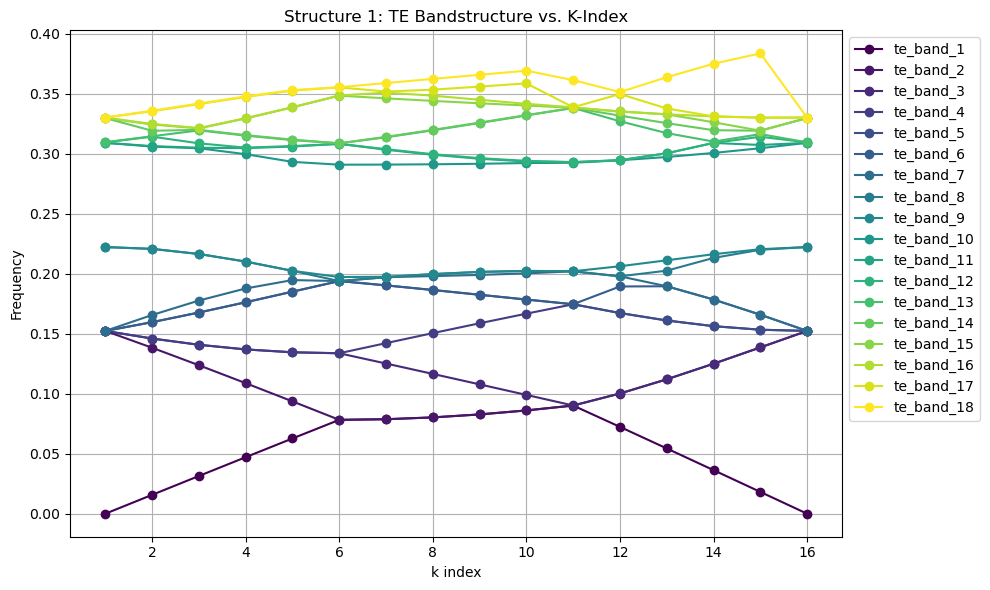

In [61]:
df = pd.read_csv(io.StringIO("\n".join(output)))
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 1: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Before we move on, let's store the band gap for reference.

In [62]:
gaps = ms.output_gaps(ms.band_range_data)
percent, gap_min, gap_max = gaps[0]

Gap from band 9 (0.22214620470304963) to band 10 (0.2907723079161018), 26.75906660596902%


# 2. Crystal structure with a waveguide defect. 

In order to introduce a line defect, we need a 3x3 grid. Here, we remove the middle row of holes by overwriting them with the background material. 

In [63]:
# Add a defect.
defect_geometry = mp.Cylinder(radius=0.3, material=default_material)
shift_vector = mp.Vector3(1, 0, 0)  
min_multiple = -1
max_multiple = 1  
defect_line = mp.geometric_object_duplicates(shift_vector, min_multiple, max_multiple, defect_geometry)
ms.geometry.extend(defect_line)

Once again, we run simulations to get the TE wave bandstructure. 

In [64]:
import io
import contextlib

f = io.StringIO()
with contextlib.redirect_stdout(f):
    ms.run_te()

output = f.getvalue()
output = [line for line in output.splitlines() if line.startswith("tefreqs")]

_ = ms.output_gaps(ms.band_range_data)


Gap from band 9 (0.21598599123802403) to band 10 (0.22055800217308497), 2.094639259303842%
Gap from band 14 (0.2751098219032529) to band 15 (0.29584440011300006), 7.2631315822573725%


Finally, we graph the results. 

/tmp/ipykernel_56079/1374505635.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


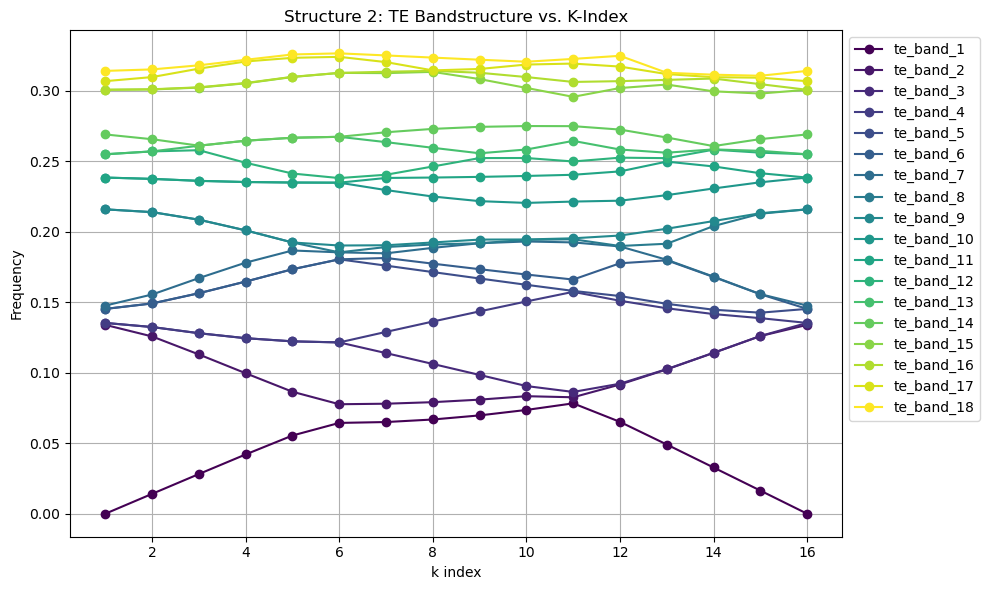

In [65]:
df = pd.read_csv(io.StringIO("\n".join(output)))
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 2: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Now, we graph the waveguide's bandstructure again, but with the bandgap from part 1 highlighted in gray. 

/tmp/ipykernel_56079/2347428892.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


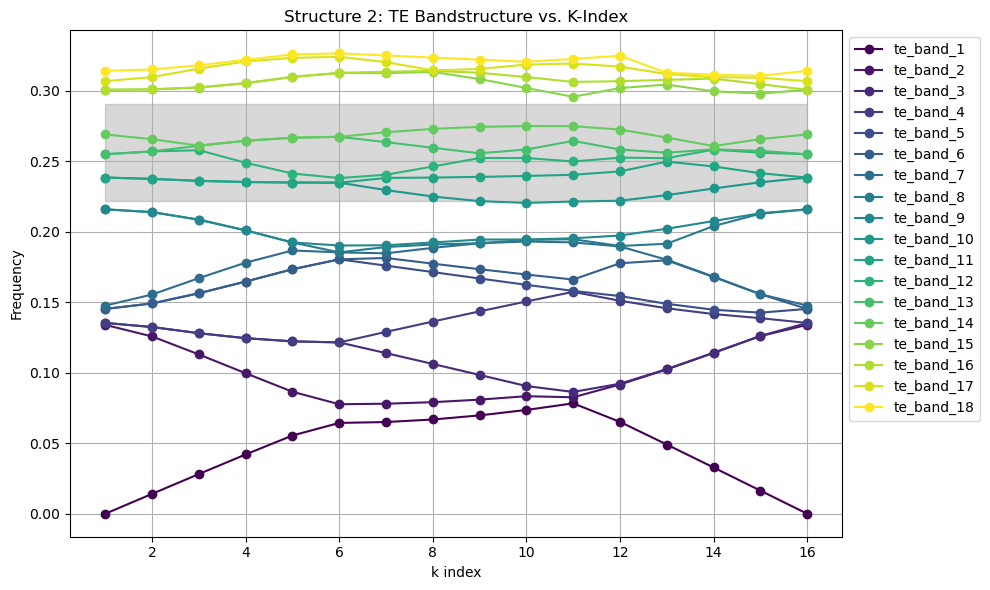

In [66]:
plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 2: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.fill_betweenx([gap_min, gap_max], df['k_index'].min(), df['k_index'].max(), color='grey', alpha=0.3, label='Band gap (perfect crystal)')

plt.show()